# Modelo de regresión lineal 1

In [123]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from regressors import stats

# Estilos
sns.set(style='whitegrid')

## Preprocesamiento y entrenamiento
* Sin la columna Sex

In [124]:
df = pd.read_csv('../datos/procesados/edad_cangrejos.csv')
df = df.drop(columns=['Sex', 'Length', 'Height'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diameter        3893 non-null   float64
 1   Weight          3893 non-null   float64
 2   Shucked Weight  3893 non-null   float64
 3   Viscera Weight  3893 non-null   float64
 4   Shell Weight    3893 non-null   float64
 5   Age             3893 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.6 KB


In [125]:
# se selecciona la variable objetivo y los predictores
X = df.drop(columns=['Age'])
y = df.Age
X_cols = X.columns

# Se instancia el Scaler
scaler = StandardScaler()

# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se escalan los datos y se convierten en df
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [126]:
# Instanciar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [127]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df['Age'].mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, y_test), 3)

In [128]:
# Resumen
stats.summary(modelo, X_test, y_test, X_cols)

Residuals:
  Min     1Q  Median      3Q     Max
3.093 8.4532 10.0022 11.3742 17.9243


Coefficients:
                Estimate  Std. Error   t value   p value
_intercept      9.997431    0.078316  127.6547  0.000000
Diameter        1.416108    0.200922    7.0481  0.000000
Weight          4.109184    0.753766    5.4515  0.000000
Shucked Weight -4.301466    0.333983  -12.8793  0.000000
Viscera Weight -0.922445    0.265068   -3.4800  0.000529
Shell Weight    1.463731    0.278422    5.2572  0.000000
---
R-squared:  0.50279,    Adjusted R-squared:  0.49957
F-statistic: 156.33 on 5 features


In [129]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"rmse: {rmse} unidades de la variablre objetivo")
print(f'Error relativo promedio: {error_relativo}')
print(f'mae: {mae}')

r2: 0.503
mse: 4.778
rmse: 2.186 unidades de la variablre objetivo
Error relativo promedio: 21.959
mae: 1.613


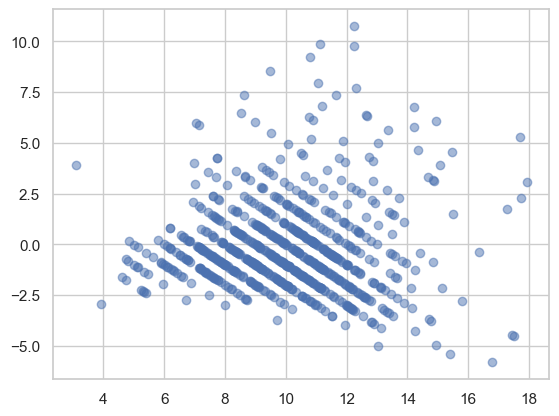

In [130]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()